In [1]:
# code : https://github.com/jaimezorno/Deep-Learning-for-NLP-Creating-a-Chatbot/blob/master/Deep%20Learning%20for%20NLP-%20Creating%20a%20chatbot.ipynb
# post : https://towardsdatascience.com/deep-learning-for-nlp-creating-a-chatbot-with-keras-da5ca051e051
# ty

In [22]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

#Imports
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout, add,  dot, concatenate, LSTM

import string

In [23]:
wine_reviews = pd.read_csv("data/wine reviews.csv")
wine_reviews_447_1 = pd.read_csv("data/447_1.csv")

In [24]:
def clean_doc(doc): 
    """
    Sometimes you need bleach,
    sometimes CLR.
    sometimes you wash the walls
    sometimes the floors.
    """
    
    doc = doc.translate(str.maketrans('', '', string.punctuation))
    
    tokens = doc.split()
    
    stop_words = set(stopwords.words('english'))
    tokens = [tkn.lower() for tkn in tokens if not tkn in stop_words]
    
    tokens = [tkn for tkn in tokens if tkn != '']
    
    return tokens # tokens is a list

In [25]:
wine_reviews.shape

(2890, 32)

In [26]:
wine_reviews.head(2)

,id,asins,brand,categories,dateAdded,dateUpdated,descriptions,dimension,ean,flavors,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,sourceURLs,upc,weight
0,AV13ClKCGV-KLJ3akN68,NaN,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:11Z,2018-01-10T18:06:28Z,NaN,1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This a fantastic white wine for any occasion!,My Favorite White Wine,NaN,NaN,Bjh,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,4.9213E+11,1.0 lbs
1,AV13CsvW-jtxr-f38AQO,NaN,Fresh Craft Co.,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:42Z,2018-01-10T05:38:33Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",4.25 in x 4.25 in x 5.25 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,"Tart, not sweet...very refreshing and delicious!",Yum!!,NaN,NaN,Wino,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,83120003441,2.45 lbs


In [27]:
wine_reviews_447_1.shape

(1231, 34)

In [28]:
wine_reviews_447_1.head(2)

,id,asins,brand,categories,dateAdded,dateUpdated,descriptions,dimension,ean,flavors,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,sourceURLs,upc,weight
0,AV00t6hpvKc47QAVgBMG,B00GFYMHRE,DUPLIN,"Food,Beverages,Beer, Wine & Spirits,Wine,Red",2017-07-12T02:53:57Z,2018-01-08T08:00:32Z,"[{""dateSeen"":[""2017-07-20T18:11:00.000Z"",""2017...",NaN,82504912348,NaN,...,https://www.walmart.com/reviews/product/101824387,A sweet smooth taste in every drop.,I love the sweet smooth muscadine taste.,NaN,NaN,Lexie,NaN,https://www.walmart.com/ip/Duplin-Carolina-Red...,82504912348,2 pounds
1,AV00tABdGV-KLJ3ac19r,B06ZZCZD5W,WOODFORD RESERVE,"Food,Beverages,Beer, Wine & Spirits,Cocktail M...",2017-07-12T02:49:58Z,2017-09-06T04:49:34Z,"[{""dateSeen"":[""2017-08-23T10:57:30.792Z""],""sou...",NaN,NaN,NaN,...,http://www.ebay.com/itm/Woodford-Reserve-Spice...,This is a terrific product. Just a few drops i...,Delicious!,NaN,NaN,tulipkoda46,NaN,https://www.walmart.com/ip/Woodford-Reserve-Sp...,8.55783E+11,4.8 ounces


In [29]:
df = pd.concat([wine_reviews, wine_reviews_447_1])

In [30]:
df.head()

,id,asins,brand,categories,dateAdded,dateUpdated,descriptions,dimension,ean,flavors,...,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,sourceURLs,upc,weight,primaryCategories,quantities
0,AV13ClKCGV-KLJ3akN68,NaN,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:11Z,2018-01-10T18:06:28Z,NaN,1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,My Favorite White Wine,NaN,NaN,Bjh,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,4.9213E+11,1.0 lbs,NaN,NaN
1,AV13CsvW-jtxr-f38AQO,NaN,Fresh Craft Co.,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:42Z,2018-01-10T05:38:33Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",4.25 in x 4.25 in x 5.25 in,NaN,NaN,...,Yum!!,NaN,NaN,Wino,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,83120003441,2.45 lbs,NaN,NaN
2,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,A New Favorite!,NaN,NaN,Bama Mom,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs,NaN,NaN
3,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,"Bold, Flavorful, Aromatic, Delicious",NaN,NaN,Av Dub,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs,NaN,NaN
4,AV13CYL4-jtxr-f37_-t,NaN,Wine Cube153,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:18Z,2018-01-10T18:06:29Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,"Yum! Plus, Environmentally Friendly!",Overland Park,NaN,Chelseamay,NaN,https://redsky.target.com/groot-domain-api/v1/...,85200600465,1.0 lbs,NaN,NaN


In [31]:
df.primaryCategories.unique()

array([nan, 'Food Beverages & Tobacco',
       'Food Beverages & Tobacco,Food Beverages & Tobacco',
       'Home & Garden,Food Beverages & Tobacco,Home & Garden',
       'Food Beverages & Tobacco,Health & Beauty',
       'Food Beverages & Tobacco,Home & Garden',
       'Home & Garden,Food Beverages & Tobacco'], dtype=object)

In [32]:
df.head()

,id,asins,brand,categories,dateAdded,dateUpdated,descriptions,dimension,ean,flavors,...,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,sourceURLs,upc,weight,primaryCategories,quantities
0,AV13ClKCGV-KLJ3akN68,NaN,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:11Z,2018-01-10T18:06:28Z,NaN,1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,My Favorite White Wine,NaN,NaN,Bjh,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,4.9213E+11,1.0 lbs,NaN,NaN
1,AV13CsvW-jtxr-f38AQO,NaN,Fresh Craft Co.,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:42Z,2018-01-10T05:38:33Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",4.25 in x 4.25 in x 5.25 in,NaN,NaN,...,Yum!!,NaN,NaN,Wino,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,83120003441,2.45 lbs,NaN,NaN
2,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,A New Favorite!,NaN,NaN,Bama Mom,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs,NaN,NaN
3,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,"Bold, Flavorful, Aromatic, Delicious",NaN,NaN,Av Dub,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs,NaN,NaN
4,AV13CYL4-jtxr-f37_-t,NaN,Wine Cube153,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:18Z,2018-01-10T18:06:29Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,"Yum! Plus, Environmentally Friendly!",Overland Park,NaN,Chelseamay,NaN,https://redsky.target.com/groot-domain-api/v1/...,85200600465,1.0 lbs,NaN,NaN


In [33]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'dateAdded', 'dateUpdated',
       'descriptions', 'dimension', 'ean', 'flavors', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend',
       'reviews.id', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'sourceURLs', 'upc', 'weight', 'primaryCategories', 'quantities'],
      dtype='object')

In [34]:
[item for item in wine_reviews_447_1 if item not in wine_reviews]

['primaryCategories', 'quantities']

In [35]:
df = df[df.categories.str.contains('Wine')]

In [36]:
data = df[['name', 'reviews.doRecommend', 'reviews.text', 'reviews.rating']]

In [37]:
data['text'] = df["reviews.title"] + " " + df["reviews.text"]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
data.text.isnull().sum()

84

In [39]:
df['reviews.doRecommend'].isnull().sum()

1557

In [40]:
data = data.dropna(subset=['text', 'reviews.doRecommend'])

In [41]:
data['processed_text'] = data['text'].apply(lambda xyz: clean_doc(xyz))

In [42]:
data['reviews.doRecommend']

0       True
1       True
2       True
3       True
4       True
        ... 
1212    True
1213    True
1214    True
1215    True
1216    True
Name: reviews.doRecommend, Length: 2497, dtype: object

In [43]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(data['reviews.doRecommend'])
data['cat_rec'] = le.transform(data['reviews.doRecommend'])

In [44]:
data.head()

,name,reviews.doRecommend,reviews.text,reviews.rating,text,processed_text,cat_rec
0,Ecco Domani174 Pinot Grigio - 750ml Bottle,True,This a fantastic white wine for any occasion!,5.0,My Favorite White Wine This a fantastic white ...,"[my, favorite, white, wine, this, fantastic, w...",1
1,Fresh Craft174 Mango Citrus - 4pk / 250ml Bottle,True,"Tart, not sweet...very refreshing and delicious!",5.0,"Yum!! Tart, not sweet...very refreshing and de...","[yum, tart, sweetvery, refreshing, delicious]",1
2,1000 Stories174 Zinfandel - 750ml Bottle,True,I was given this wine so it was a delightful s...,5.0,A New Favorite! I was given this wine so it wa...,"[a, new, favorite, i, given, wine, delightful,...",1
3,1000 Stories174 Zinfandel - 750ml Bottle,True,This is a phenomenal wine and my new favorite ...,5.0,"Bold, Flavorful, Aromatic, Delicious This is a...","[bold, flavorful, aromatic, delicious, this, p...",1
4,Pink Moscato - 3l Bottle - Wine Cube153,True,4 750ml bottles for the price of two With way ...,5.0,"Yum! Plus, Environmentally Friendly! 4 750ml b...","[yum, plus, environmentally, friendly, 4, 750m...",1


In [45]:
data['rec'] = data['reviews.doRecommend'].apply(lambda absizzle: 'yes' if absizzle==True else 'no')

In [46]:
data.to_csv("msds543_chatbotdata.csv")

In [47]:
datums = []
qtown = ['would', 'u', 'buy', 'this', '?']

for index, record in data.iterrows():
    p_text = record['processed_text']
    do_u_rec = record['rec']
    tupe_no_dupe = (p_text, qtown, do_u_rec)
    datums.append(tupe_no_dupe)

In [48]:
train_data, test_data = train_test_split(datums, test_size=0.33, 
                                          random_state=86753-0,
                                          shuffle=True)

In [49]:
1672+825

2497

In [50]:
len(train_data)

1672

In [51]:
len(test_data)

825

In [52]:
train_data[0]

(['great', 'wings', 'my', 'son', 'grandson', 'love', 'wings'],
 ['would', 'u', 'buy', 'this', '?'],
 'yes')

In [53]:
all_data = test_data + train_data

In [54]:
#First we will build a set of all the words in the dataset:
vocab = set()
for review, question, answer in all_data:
    vocab = vocab.union(set(review))
    vocab = vocab.union(set(question))

vocab.add('no')
vocab.add('yes')

In [55]:
vocab_len = len(vocab) + 1

In [56]:
all_reviews_lens = [len(data[0]) for data in all_data]

In [57]:
max_review_len = (max(all_reviews_lens))

In [58]:
max_question_len = max([len(data[1]) for data in all_data])

In [59]:
#Create an instance of the tokenizer object:
tokenizer = Tokenizer(filters = [])
tokenizer.fit_on_texts(vocab)

In [60]:
#Tokenize the stories, questions and answers:
train_review_text = []
train_question_text = []
train_answers = []

In [61]:
#Separating each of the elements
for review, question, answer in train_data:
    train_review_text.append(review)
    train_question_text.append(question) 
    train_answers.append(answer)

In [62]:
#Coverting the text into the indexes 
train_review_seq = tokenizer.texts_to_sequences(train_review_text)

In [63]:
#Create a function for vectorizing the stories, questions and answers:
def vectorize_stories(data,word_index = tokenizer.word_index,
                      max_review_len = max_review_len, 
                      max_question_len = max_question_len):
    #vectorized stories:
    X = []
    #vectorized questions:
    Xq = []
    #vectorized answers:
    Y = []
    
    for review, question, answer in data:
        #Getting indexes for each word in the story
        x = [word_index[word] for word in review]
        #Getting indexes for each word in the story
        xq = [word_index[word.lower()] for word in question]
        #For the answers
        y = np.zeros(len(word_index) + 1) #Index 0 Reserved when padding the sequences
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    #Now we have to pad these sequences:
    return(pad_sequences(X,maxlen=max_review_len), pad_sequences(Xq, maxlen=max_question_len), np.array(Y))
      

In [64]:
inputs_train, questions_train, answers_train = vectorize_stories(train_data)

In [65]:
inputs_test, questions_test, answers_test = vectorize_stories(test_data)

In [66]:
inputs_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [67]:
train_review_text[0]

['great', 'wings', 'my', 'son', 'grandson', 'love', 'wings']

In [68]:
train_review_seq[0]

[4384, 864, 4089, 3525, 3772, 2003, 864]

In [69]:
# We need to create the placeholders 
#The Input function is used to create a keras tensor
#PLACEHOLDER shape = (max_story_len,batch_size)
#These are our placeholder for the inputs, ready to recieve batches of the stories and the questions
input_sequence = Input((max_review_len,)) #As we dont know batch size yet
question = Input((max_question_len,))

In [70]:
#Create input encoder M:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_len,output_dim = 64)) #From paper
input_encoder_m.add(Dropout(0.3))

#Outputs: (Samples, story_maxlen,embedding_dim) -- Gives a list of the lenght of the samples where each item has the
#lenght of the max story lenght and every word is embedded in the embbeding dimension

2022-08-22 23:48:19.012327: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [71]:
#Create input encoder C:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_len,output_dim = max_question_len)) #From paper
input_encoder_c.add(Dropout(0.3))

#Outputs: (samples, story_maxlen, max_question_len)

In [72]:
#Create question encoder:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_len,output_dim = 64,input_length=max_question_len)) #From paper
question_encoder.add(Dropout(0.3))

#Outputs: (samples, question_maxlen, embedding_dim)

In [73]:
#Now lets encode the sequences, passing the placeholders into our encoders:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [74]:
#Use dot product to compute similarity between input encoded m and question 
#Like in the paper:
match = dot([input_encoded_m,question_encoded], axes = (2,2))
match = Activation('softmax')(match)

In [75]:
#For the response we want to add this match with the ouput of input_encoded_c
response = add([match,input_encoded_c])
response = Permute((2,1))(response) #Permute Layer: permutes dimensions of input


In [76]:
#Once we have the response we can concatenate it with the question encoded:
answer = concatenate([response, question_encoded])

In [77]:
answer

<KerasTensor: shape=(None, 5, 250) dtype=float32 (created by layer 'concatenate')>

In [78]:
# Reduce the answer tensor with a RNN (LSTM)
answer = LSTM(32)(answer)

In [79]:
#Regularization with dropout:
answer = Dropout(0.2)(answer)
#Output layer:
answer = Dense(vocab_len)(answer) #Output shape: (Samples, Vocab_size) #Yes or no and all 0s

In [80]:
#Now we need to output a probability distribution for the vocab, using softmax:
answer = Activation('softmax')(answer)

In [81]:
#Now we build the final model:
model = Model([input_sequence,question], answer)

In [82]:
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#Categorical instead of binary cross entropy as because of the way we are training
#we could actually see any of the words from the vocab as output
#however, we should only see yes or no

In [83]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 186)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     288448      ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 5, 64)        288448      ['input_2[0][0]']                
                                                                                              

In [84]:
history = model.fit([inputs_train,
                     questions_train],
                    answers_train, 
                    batch_size = 32, 
                    epochs = 1000, validation_data = ([inputs_test,
                                                       questions_test],
                                                      answers_test))

Epoch 1/1000
53/53 [==============================] - 5s 35ms/step - loss: 5.9163 - accuracy: 0.9205 - val_loss: 3.7297 - val_accuracy: 0.9370
Epoch 2/1000
53/53 [==============================] - 1s 22ms/step - loss: 2.2746 - accuracy: 0.9581 - val_loss: 1.0525 - val_accuracy: 0.9370
Epoch 3/1000
53/53 [==============================] - 1s 22ms/step - loss: 0.5928 - accuracy: 0.9581 - val_loss: 0.3475 - val_accuracy: 0.9370
Epoch 4/1000
53/53 [==============================] - 1s 23ms/step - loss: 0.2463 - accuracy: 0.9581 - val_loss: 0.2739 - val_accuracy: 0.9370
Epoch 5/1000
53/53 [==============================] - 1s 24ms/step - loss: 0.1930 - accuracy: 0.9581 - val_loss: 0.2505 - val_accuracy: 0.9370
Epoch 6/1000
53/53 [==============================] - 2s 29ms/step - loss: 0.1817 - accuracy: 0.9581 - val_loss: 0.2436 - val_accuracy: 0.9370
Epoch 7/1000
53/53 [==============================] - 1s 25ms/step - loss: 0.1759 - accuracy: 0.9581 - val_loss: 0.2419 - val_accuracy: 0.9370

Epoch 58/1000
53/53 [==============================] - 1s 24ms/step - loss: 0.0574 - accuracy: 0.9809 - val_loss: 0.1629 - val_accuracy: 0.9600
Epoch 59/1000
53/53 [==============================] - 1s 24ms/step - loss: 0.0543 - accuracy: 0.9850 - val_loss: 0.1647 - val_accuracy: 0.9661
Epoch 60/1000
53/53 [==============================] - 1s 24ms/step - loss: 0.0459 - accuracy: 0.9833 - val_loss: 0.1653 - val_accuracy: 0.9624
Epoch 61/1000
53/53 [==============================] - 1s 28ms/step - loss: 0.0396 - accuracy: 0.9886 - val_loss: 0.1616 - val_accuracy: 0.9612
Epoch 62/1000
53/53 [==============================] - 1s 28ms/step - loss: 0.0378 - accuracy: 0.9886 - val_loss: 0.2307 - val_accuracy: 0.9539
Epoch 63/1000
53/53 [==============================] - 2s 30ms/step - loss: 0.0312 - accuracy: 0.9892 - val_loss: 0.1870 - val_accuracy: 0.9624
Epoch 64/1000
53/53 [==============================] - 2s 33ms/step - loss: 0.0464 - accuracy: 0.9839 - val_loss: 0.1674 - val_accuracy:

Epoch 115/1000
53/53 [==============================] - 2s 34ms/step - loss: 1.1253e-04 - accuracy: 1.0000 - val_loss: 0.3502 - val_accuracy: 0.9636
Epoch 116/1000
53/53 [==============================] - 3s 48ms/step - loss: 0.0097 - accuracy: 0.9982 - val_loss: 0.3570 - val_accuracy: 0.9624
Epoch 117/1000
53/53 [==============================] - 2s 36ms/step - loss: 1.2201e-04 - accuracy: 1.0000 - val_loss: 0.3524 - val_accuracy: 0.9648
Epoch 118/1000
53/53 [==============================] - 2s 31ms/step - loss: 0.0039 - accuracy: 0.9994 - val_loss: 0.3879 - val_accuracy: 0.9648
Epoch 119/1000
53/53 [==============================] - 2s 33ms/step - loss: 0.0128 - accuracy: 0.9988 - val_loss: 0.3710 - val_accuracy: 0.9600
Epoch 120/1000
53/53 [==============================] - 2s 42ms/step - loss: 0.0051 - accuracy: 0.9994 - val_loss: 0.4205 - val_accuracy: 0.9624
Epoch 121/1000
53/53 [==============================] - 2s 36ms/step - loss: 2.5747e-04 - accuracy: 1.0000 - val_loss: 0.3

53/53 [==============================] - 2s 40ms/step - loss: 3.6148e-08 - accuracy: 1.0000 - val_loss: 0.8603 - val_accuracy: 0.9600
Epoch 226/1000
53/53 [==============================] - 2s 41ms/step - loss: 0.0070 - accuracy: 0.9994 - val_loss: 0.8543 - val_accuracy: 0.9612
Epoch 227/1000
53/53 [==============================] - 2s 41ms/step - loss: 1.5258e-08 - accuracy: 1.0000 - val_loss: 0.8545 - val_accuracy: 0.9612
Epoch 228/1000
53/53 [==============================] - 2s 37ms/step - loss: 2.5881e-08 - accuracy: 1.0000 - val_loss: 0.8550 - val_accuracy: 0.9612
Epoch 229/1000
53/53 [==============================] - 1s 25ms/step - loss: 1.5356e-07 - accuracy: 1.0000 - val_loss: 0.8593 - val_accuracy: 0.9612
Epoch 230/1000
53/53 [==============================] - 2s 37ms/step - loss: 4.5701e-08 - accuracy: 1.0000 - val_loss: 0.8612 - val_accuracy: 0.9612
Epoch 231/1000
53/53 [==============================] - 2s 40ms/step - loss: 5.8748e-08 - accuracy: 1.0000 - val_loss: 0.8777

53/53 [==============================] - 2s 33ms/step - loss: 1.6398e-09 - accuracy: 1.0000 - val_loss: 0.9510 - val_accuracy: 0.9612
Epoch 336/1000
53/53 [==============================] - 2s 35ms/step - loss: 9.1973e-09 - accuracy: 1.0000 - val_loss: 0.9462 - val_accuracy: 0.9600
Epoch 337/1000
53/53 [==============================] - 2s 31ms/step - loss: 1.6398e-09 - accuracy: 1.0000 - val_loss: 0.9463 - val_accuracy: 0.9600
Epoch 338/1000
53/53 [==============================] - 1s 28ms/step - loss: 8.5557e-10 - accuracy: 1.0000 - val_loss: 0.9466 - val_accuracy: 0.9600
Epoch 339/1000
53/53 [==============================] - 1s 25ms/step - loss: 5.2760e-09 - accuracy: 1.0000 - val_loss: 0.9479 - val_accuracy: 0.9588
Epoch 340/1000
53/53 [==============================] - 1s 25ms/step - loss: 9.8390e-09 - accuracy: 1.0000 - val_loss: 0.9515 - val_accuracy: 0.9600
Epoch 341/1000
53/53 [==============================] - 2s 30ms/step - loss: 1.3547e-09 - accuracy: 1.0000 - val_loss: 0.

53/53 [==============================] - 1s 25ms/step - loss: 8.2705e-09 - accuracy: 1.0000 - val_loss: 0.9632 - val_accuracy: 0.9624
Epoch 446/1000
53/53 [==============================] - 1s 25ms/step - loss: 8.5557e-10 - accuracy: 1.0000 - val_loss: 0.9637 - val_accuracy: 0.9624
Epoch 447/1000
53/53 [==============================] - 2s 35ms/step - loss: 2.9764e-04 - accuracy: 1.0000 - val_loss: 0.9901 - val_accuracy: 0.9636
Epoch 448/1000
53/53 [==============================] - 1s 25ms/step - loss: 1.7824e-09 - accuracy: 1.0000 - val_loss: 0.9901 - val_accuracy: 0.9636
Epoch 449/1000
53/53 [==============================] - 1s 26ms/step - loss: 2.6995e-05 - accuracy: 1.0000 - val_loss: 0.9616 - val_accuracy: 0.9624
Epoch 450/1000
53/53 [==============================] - 1s 25ms/step - loss: 1.2121e-09 - accuracy: 1.0000 - val_loss: 0.9617 - val_accuracy: 0.9624
Epoch 451/1000
53/53 [==============================] - 1s 25ms/step - loss: 6.6306e-09 - accuracy: 1.0000 - val_loss: 0.

53/53 [==============================] - 1s 26ms/step - loss: 3.3510e-09 - accuracy: 1.0000 - val_loss: 1.0126 - val_accuracy: 0.9600
Epoch 556/1000
53/53 [==============================] - 1s 25ms/step - loss: 3.2797e-09 - accuracy: 1.0000 - val_loss: 1.0101 - val_accuracy: 0.9612
Epoch 557/1000
53/53 [==============================] - 1s 25ms/step - loss: 5.7038e-10 - accuracy: 1.0000 - val_loss: 1.0103 - val_accuracy: 0.9612
Epoch 558/1000
53/53 [==============================] - 1s 25ms/step - loss: 4.0639e-09 - accuracy: 1.0000 - val_loss: 1.0125 - val_accuracy: 0.9612
Epoch 559/1000
53/53 [==============================] - 1s 25ms/step - loss: 5.7038e-10 - accuracy: 1.0000 - val_loss: 1.0126 - val_accuracy: 0.9612
Epoch 560/1000
53/53 [==============================] - 1s 25ms/step - loss: 8.5557e-10 - accuracy: 1.0000 - val_loss: 1.0125 - val_accuracy: 0.9612
Epoch 561/1000
53/53 [==============================] - 1s 24ms/step - loss: 8.1279e-09 - accuracy: 1.0000 - val_loss: 1.

53/53 [==============================] - 2s 32ms/step - loss: 1.4259e-10 - accuracy: 1.0000 - val_loss: 1.0158 - val_accuracy: 0.9612
Epoch 666/1000
53/53 [==============================] - 2s 29ms/step - loss: 7.8427e-10 - accuracy: 1.0000 - val_loss: 1.0149 - val_accuracy: 0.9612
Epoch 667/1000
53/53 [==============================] - 2s 31ms/step - loss: 2.4954e-09 - accuracy: 1.0000 - val_loss: 1.0084 - val_accuracy: 0.9612
Epoch 668/1000
53/53 [==============================] - 2s 46ms/step - loss: 7.1297e-10 - accuracy: 1.0000 - val_loss: 1.0100 - val_accuracy: 0.9612
Epoch 669/1000
53/53 [==============================] - 2s 39ms/step - loss: 6.1316e-09 - accuracy: 1.0000 - val_loss: 0.9992 - val_accuracy: 0.9612
Epoch 670/1000
53/53 [==============================] - 2s 39ms/step - loss: 1.9250e-09 - accuracy: 1.0000 - val_loss: 1.0153 - val_accuracy: 0.9612
Epoch 671/1000
53/53 [==============================] - 2s 39ms/step - loss: 0.0057 - accuracy: 0.9994 - val_loss: 0.9119

53/53 [==============================] - 1s 24ms/step - loss: 3.5649e-10 - accuracy: 1.0000 - val_loss: 1.0468 - val_accuracy: 0.9612
Epoch 776/1000
53/53 [==============================] - 1s 24ms/step - loss: 1.1408e-09 - accuracy: 1.0000 - val_loss: 1.0474 - val_accuracy: 0.9612
Epoch 777/1000
53/53 [==============================] - 1s 24ms/step - loss: 1.4972e-09 - accuracy: 1.0000 - val_loss: 1.0476 - val_accuracy: 0.9624
Epoch 778/1000
53/53 [==============================] - 1s 24ms/step - loss: 1.8537e-09 - accuracy: 1.0000 - val_loss: 1.0492 - val_accuracy: 0.9612
Epoch 779/1000
53/53 [==============================] - 1s 25ms/step - loss: 7.1297e-11 - accuracy: 1.0000 - val_loss: 1.0493 - val_accuracy: 0.9612
Epoch 780/1000
53/53 [==============================] - 1s 24ms/step - loss: 1.7824e-09 - accuracy: 1.0000 - val_loss: 1.0494 - val_accuracy: 0.9612
Epoch 781/1000
53/53 [==============================] - 1s 25ms/step - loss: 1.9250e-09 - accuracy: 1.0000 - val_loss: 1.

53/53 [==============================] - 1s 26ms/step - loss: 7.1297e-11 - accuracy: 1.0000 - val_loss: 1.1373 - val_accuracy: 0.9624
Epoch 886/1000
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.1376 - val_accuracy: 0.9624
Epoch 887/1000
53/53 [==============================] - 1s 26ms/step - loss: 7.1297e-11 - accuracy: 1.0000 - val_loss: 1.1374 - val_accuracy: 0.9624
Epoch 888/1000
53/53 [==============================] - 1s 25ms/step - loss: 7.1297e-10 - accuracy: 1.0000 - val_loss: 1.1365 - val_accuracy: 0.9624
Epoch 889/1000
53/53 [==============================] - 1s 25ms/step - loss: 2.8519e-10 - accuracy: 1.0000 - val_loss: 1.1283 - val_accuracy: 0.9624
Epoch 890/1000
53/53 [==============================] - 1s 26ms/step - loss: 7.1297e-10 - accuracy: 1.0000 - val_loss: 1.1268 - val_accuracy: 0.9624
Epoch 891/1000
53/53 [==============================] - 1s 26ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.

53/53 [==============================] - 2s 34ms/step - loss: 5.7038e-10 - accuracy: 1.0000 - val_loss: 1.0609 - val_accuracy: 0.9600
Epoch 996/1000
53/53 [==============================] - 2s 42ms/step - loss: 9.1260e-09 - accuracy: 1.0000 - val_loss: 1.0597 - val_accuracy: 0.9612
Epoch 997/1000
53/53 [==============================] - 2s 45ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0597 - val_accuracy: 0.9612
Epoch 998/1000
53/53 [==============================] - 2s 44ms/step - loss: 2.8519e-09 - accuracy: 1.0000 - val_loss: 1.0597 - val_accuracy: 0.9612
Epoch 999/1000
53/53 [==============================] - 3s 66ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 1.1167 - val_accuracy: 0.9636
Epoch 1000/1000
53/53 [==============================] - 4s 70ms/step - loss: 0.0097 - accuracy: 0.9994 - val_loss: 1.0778 - val_accuracy: 0.9624


In [85]:
filename = 'Z_chatbot_100_epochs.h5'
model.save(filename)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


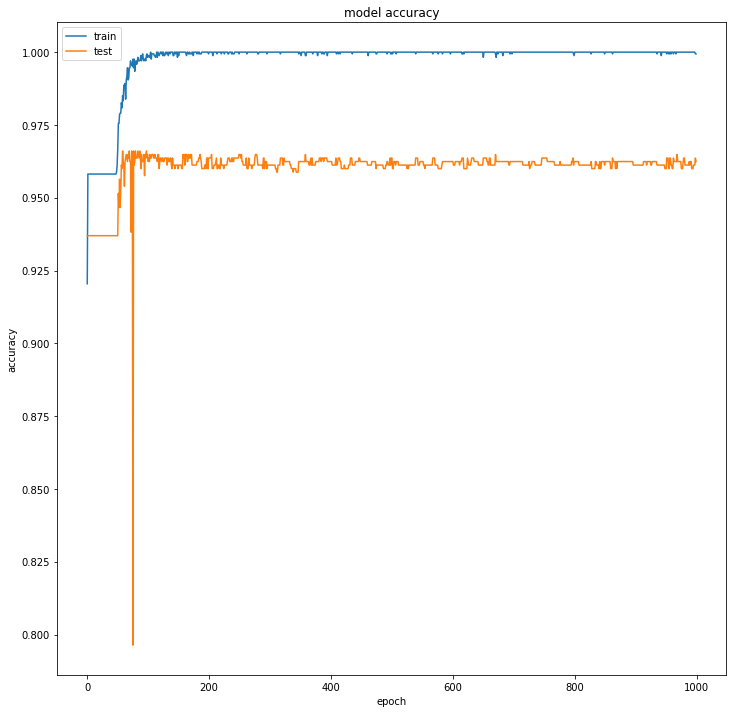

In [86]:
#Lets plot the increase of accuracy as we increase the number of training epochs
#We can see that without any training the acc is about 50%, random guessing
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=(12,12))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [87]:
#To load a model that we have already trained and saved:
model.load_weights('Z_chatbot_100_epochs.h5')

In [88]:
#Lets check out the predictions on the test set:
#These are just probabilities for every single word on the vocab
pred_results = model.predict(([inputs_test,questions_test]))

In [89]:
#First test data point
test_data[0]

(['perfect',
  'so',
  'i',
  'bought',
  'first',
  'carmex',
  'three',
  'years',
  'ago',
  'i',
  'think',
  'i',
  'saw',
  'friend',
  'i',
  'love',
  'i',
  'use',
  'i',
  'wake',
  'day',
  'needed',
  'i',
  'go',
  'bed',
  'my',
  'lips',
  'havent',
  'dry',
  'three',
  'years',
  'how',
  'amazing',
  'isnt',
  'i',
  'used',
  'one',
  'jar',
  'i',
  'halfway',
  'second',
  'one',
  'one',
  'half',
  'jar',
  'three',
  'years',
  'amazing',
  'i',
  'also',
  'got',
  'cherry',
  'one',
  'recently',
  'i',
  'love',
  'scent',
  'ah',
  'product',
  'perfect',
  'i',
  'really',
  'recommend',
  'everyone'],
 ['would', 'u', 'buy', 'this', '?'],
 'yes')

In [90]:
#These are the probabilities for the vocab words using the 1st sentence
pred_results[0]

array([4.1968117e-17, 4.0143075e-17, 3.8266378e-17, ..., 4.4379110e-17,
       3.8937400e-17, 4.2999598e-17], dtype=float32)

In [91]:
val_max = np.argmax(pred_results[0])

for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key
print(k)

yes


In [92]:
#See probability:
pred_results[0][val_max]

1.0

In [93]:
#Now, we can make our own questions using the vocabulary we have
vocab

{'further',
 'tastier',
 'grilled',
 'cheaper',
 'ina',
 'parched',
 'capacity',
 'open',
 'complaint',
 'productsthis',
 'cabinet',
 'good',
 'your',
 'adds',
 '44',
 'ah',
 'mules',
 'speed',
 'cider',
 'pizza',
 'late',
 'heavy',
 'job',
 'needed',
 'zingyzangy',
 'aguas',
 'bigger',
 'orignalbest',
 'nigroni',
 'kisses',
 'glossy',
 'honor',
 'corners',
 'luccio',
 'fresher',
 'primer',
 'soonand',
 'age',
 'occasion',
 'fear',
 'goodie',
 'ecstatic',
 'hands',
 'salad',
 'changing',
 'sip',
 'topped',
 'greensburg',
 'pinch',
 'kansas',
 'anytizer',
 'aroma',
 'handed',
 'uses',
 'tomato',
 'preserver',
 'leftovers',
 'dad',
 'grease',
 '18and',
 'strongbow',
 'though',
 'said',
 'swam',
 'littleits',
 'jojo',
 'sonoran',
 'stays',
 'maybe',
 'operate',
 'recomendes',
 'elementary',
 'chest',
 'brutal',
 'adult',
 'orange',
 'coca',
 'cherry',
 'addition',
 'dolls',
 'picante',
 'staple',
 'smoothies',
 'carmes',
 'reviewer',
 'workes',
 'assumed',
 'addicted',
 'brie',
 'carnivor

In [94]:
len(vocab)

4506

In [95]:
my_question = "would u buy this ?"

some_input = "tickled my nose"

In [96]:
from random import randint

def get_new_input():

    idx = 0
    new_input = ""

    while idx < 11:
        new_input = new_input + list(vocab)[randint(0, len(vocab))] + " "
        idx += 1

    return new_input

In [97]:
def get_selection():
    choose = ['yes', 'no']

    selection = randint(0,1)
    
    return choose[selection]

In [ ]:
def get_pred_of_input(some_input=None):
    #Put the data in the same format as before
    
    if some_input == None:
        some_input = get_new_input()
    
    print(some_input)    
    
    selection = get_selection()
    
    my_data = [(some_input.split(), my_question.split(), selection)]
    
    #Vectorize this data
    my_input, my_ques, my_ans = vectorize_stories(my_data)

    #Make the prediction
    pred_results = model.predict(([my_input, my_ques]))
    
    val_max = np.argmax(pred_results[0])
    
    #Correct prediction!
    for key,val in tokenizer.word_index.items():
        if val == val_max:
            k = key
    print('answer : ', k)
    
    #Confidence
    print('confidence : ', pred_results[0][val_max])

In [99]:
get_pred_of_input()

brand leak lightweight flint cocktails greatthis creamy trouble 15yearold opinion zang 
answer :  yes
confidence :  1.0


In [100]:
get_pred_of_input()

c mixes stayed exactly straight drop brunch seamless salt iraqis bulky 
answer :  yes
confidence :  1.0


In [101]:
get_pred_of_input()

medicated chapstick seemed edgewood compared impending tell overnite chemicals roscato lovely 
answer :  yes
confidence :  1.0


In [102]:
get_pred_of_input()

vary marys worse golf few guy liqueurs melts carmex whiskey excellenti 
answer :  yes
confidence :  1.0


In [103]:
get_pred_of_input()

reasonably temps almost diabetes fallen 450 protective entergetic isnt porcelain fumes 
answer :  yes
confidence :  1.0


In [104]:
get_pred_of_input('i really liked this wine i will buy it')

i really liked this wine i will buy it
answer :  yes
confidence :  1.0


In [105]:
'again' in vocab

False

In [106]:
get_pred_of_input('i really liked this wine i will buy it again')

i really liked this wine i will buy it again


KeyError: 'again'